# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"

record = 0
city_data = []

for city in cities:
    response = requests.get(f"{url}q={city}&appid={weather_api_key}&units=imperial").json()
    city_data.append(response)
    record += 1
    print(f"Processing Record {record} | {city}")

Processing Record 1 | illoqqortoormiut
Processing Record 2 | attawapiskat
Processing Record 3 | puerto ayora
Processing Record 4 | salinopolis
Processing Record 5 | busselton
Processing Record 6 | esperance
Processing Record 7 | dengfeng
Processing Record 8 | kununurra
Processing Record 9 | hermanus
Processing Record 10 | yellowknife
Processing Record 11 | bredasdorp
Processing Record 12 | ushuaia
Processing Record 13 | grand-santi
Processing Record 14 | dikson
Processing Record 15 | upernavik
Processing Record 16 | yomitan
Processing Record 17 | chara
Processing Record 18 | padang
Processing Record 19 | bangangte
Processing Record 20 | almeirim
Processing Record 21 | liverpool
Processing Record 22 | ancud
Processing Record 23 | rikitea
Processing Record 24 | saint-philippe
Processing Record 25 | gazanjyk
Processing Record 26 | qaanaaq
Processing Record 27 | bambous virieux
Processing Record 28 | whithorn
Processing Record 29 | mataura
Processing Record 30 | marystown
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Retrieving responses for each city and extracting necessary data

headers = {
        'Accept': 'application/json',
        'content-Type': 'application/json'
}
our_data = []

for city in cities:
        response = requests.request('GET', f"{url}q={city}&appid={weather_api_key}&units=imperial", headers=headers, data={})
        myjson = response.json()
        try:
                listing = [myjson['name'],myjson['coord']['lat'], myjson['coord']['lon'], myjson['main']['temp_max'],
                                myjson['main']['humidity'], myjson['clouds']['all'],myjson['wind']['speed'], myjson['sys']['country'],
                                myjson['dt']]
                our_data.append(listing)
        except (KeyError):
                print("Missing field/result... skipping.")
                print('<-------------------------->')

Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<-------------------------->
Missing field/result... skipping.
<--------------------

In [19]:
# Making data extracted into CSV file

csvheader = ['City','Lat','Lon','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']

with open('weatherpy.csv','w',encoding='UTF8',newline='') as f:
        writer = csv.writer(f)
        
        writer.writerow(csvheader)
        writer.writerows(our_data)

In [22]:
# Placing CSV file into dataframe

city_path = 'weatherpy.csv'

cities_df = pd.read_csv(city_path)

cities_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,71.55,96,12,6.58,EC,1652334286
1,Salinópolis,-0.6136,-47.3561,77.04,88,81,6.71,BR,1652334287
2,Busselton,-33.6500,115.3333,53.56,90,100,15.37,AU,1652334224
3,Esperance,-33.8667,121.9000,64.87,64,100,9.08,AU,1652334225
4,Songyang,34.4553,113.0281,68.72,56,100,6.49,CN,1652334309


In [23]:
cities_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,20.368009,12.156697,62.787880,71.695652,56.393116,7.703859,1.652334e+09
std,33.791666,89.850374,17.349714,22.032432,39.132325,5.528937,1.447637e+02
min,-54.800000,-175.200000,5.610000,1.000000,0.000000,0.000000,1.652334e+09
25%,-6.554325,-67.540550,51.280000,62.000000,15.000000,3.440000,1.652334e+09
50%,22.426100,15.399750,63.780000,77.000000,69.000000,6.475000,1.652334e+09
75%,49.932875,86.504450,76.862500,88.000000,98.000000,10.675000,1.652335e+09
max,78.218600,179.316700,107.870000,100.000000,100.000000,34.090000,1.652335e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
clean_cities_df = cities_df.loc[cities_df['Humidity'] <= 99]

print(len(clean_cities_df))
clean_cities_df.head()

541


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,71.55,96,12,6.58,EC,1652334286
1,Salinópolis,-0.6136,-47.3561,77.04,88,81,6.71,BR,1652334287
2,Busselton,-33.6500,115.3333,53.56,90,100,15.37,AU,1652334224
3,Esperance,-33.8667,121.9000,64.87,64,100,9.08,AU,1652334225
4,Songyang,34.4553,113.0281,68.72,56,100,6.49,CN,1652334309


In [34]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = cities_df.loc[cities_df['Humidity'] >= 100]

print(len(humid_cities))
humid_cities.head()

11


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
10,Grand-Santi,4.2500,-54.3833,72.05,100,70,2.42,GF,1652334229
26,Marystown,47.1666,-55.1483,46.85,100,100,8.14,CA,1652334237
66,Presidente Franco,-25.5333,-54.6167,54.12,100,0,1.14,PY,1652334325
187,Talnakh,69.4865,88.3972,31.21,100,100,5.84,RU,1652334389
232,Yar-Sale,66.8333,70.8333,35.26,100,100,5.37,RU,1652334484


In [89]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
lower = cities_df['Humidity'].quantile(.05)
upper = cities_df['Humidity'].quantile(.95)

clean_city_data = cities_df.loc[(cities_df['Humidity'] <= upper) & (cities_df['Humidity'] >= lower)]
#clean = cities_df.loc[cities_df['Humidity'] <= upper]
#clean_city_data = clean.loc[clean['Humidity'] >= lower] 

clean_city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,71.55,96,12,6.58,EC,1652334286
1,Salinópolis,-0.6136,-47.3561,77.04,88,81,6.71,BR,1652334287
2,Busselton,-33.6500,115.3333,53.56,90,100,15.37,AU,1652334224
3,Esperance,-33.8667,121.9000,64.87,64,100,9.08,AU,1652334225
4,Songyang,34.4553,113.0281,68.72,56,100,6.49,CN,1652334309


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

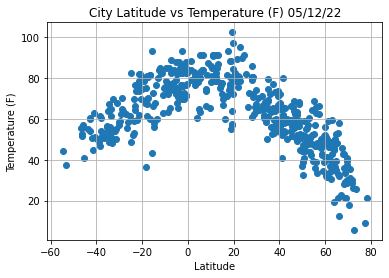

By the looks of the graph the hottest is near the equator specifically between latitude 0-20.


In [176]:
temperature_f = clean_city_data['Max Temp']
lat = clean_city_data['Lat']

plt.title("City Latitude vs Temperature (F) 05/12/22")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(lat, temperature_f)
plt.grid()
plt.savefig("../PythonAPI-Challenge/weatherimages/output.png") 
plt.show()

print( f'By the looks of the graph the hottest is near the equator specifically between latitude 0-20.')


## Latitude vs. Humidity Plot

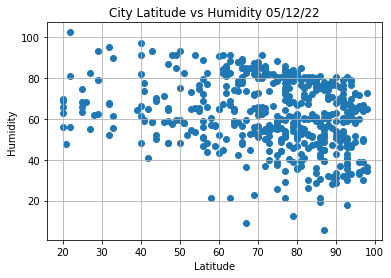

Humidity gets heavier over latitude 50.  Humidity is at its heaviest between latitudes 70-100.


In [177]:
humidity = clean_city_data['Humidity']

plt.title("City Latitude vs Humidity 05/12/22")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(humidity, temperature_f)
plt.grid()
plt.savefig("../PythonAPI-Challenge/weatherimages/output1.png") 
plt.show()

print(f'Humidity gets heavier over latitude 50.  Humidity is at its heaviest between latitudes 70-100.')

## Latitude vs. Cloudiness Plot

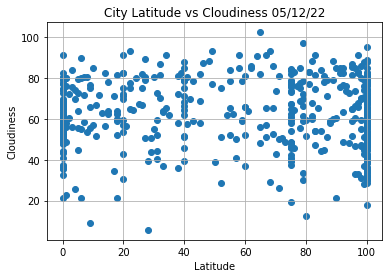

Seems as though the cloudiest of regions are near the equator and latitude 100.  Direclty in the middle of each is where it is least cloudy.


In [178]:
clouds = clean_city_data['Cloudiness']

plt.title("City Latitude vs Cloudiness 05/12/22")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(clouds, temperature_f)
plt.grid()
plt.savefig("../PythonAPI-Challenge/weatherimages/output3.png") 
plt.show()

print(f'Seems as though the cloudiest of regions are near the equator and latitude 100.  Direclty in the middle of each is where it is least cloudy.')

## Latitude vs. Wind Speed Plot

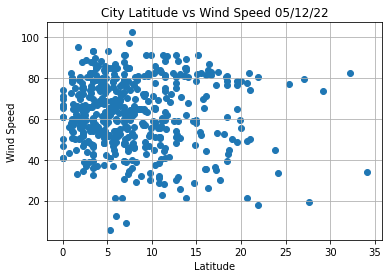

Wind speeds are at its peak near the equator specifically between latitudes 0-10


In [179]:
wind = clean_city_data['Wind Speed']

plt.title("City Latitude vs Wind Speed 05/12/22")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(wind, temperature_f)
plt.grid()
plt.savefig("../PythonAPI-Challenge/weatherimages/output4.png") 
plt.show()

print(f'Wind speeds are at its peak near the equator specifically between latitudes 0-10')

## Linear Regression

In [114]:
# Nothern and Souther Hemisphere dataframes

northern_hemisphere_df = cities_df.loc[(cities_df['Lat'] >= 0) & (cities_df['Lon'] >= 0)]

southern_hemisphere_df = cities_df.loc[(cities_df['Lat'] <= 0) & (cities_df['Lon'] <= 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7504406816996095
-------------------------------------
The distribution of Max Temperature for both hemisphere are very similar due to the fact that the highest temperatures recorded closest to the equator and coldest furthest from the equator.  Temperature seem to be more frequent in the nothern hemisphere.


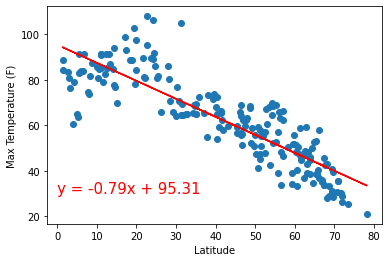

In [180]:
n_latitude = northern_hemisphere_df['Lat']
n_max_temp = northern_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_max_temp)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(n_latitude,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(n_latitude, n_max_temp)

print(f"The r-squared is: {rvalue**2}")
print("-------------------------------------")
print("The distribution of Max Temperature for both hemisphere are very similar due to the fact that the highest temperatures recorded closest to the equator and coldest furthest from the equator.  Temperature seem to be more frequent in the nothern hemisphere.")
plt.savefig("../PythonAPI-Challenge/weatherimages/output5.png") 
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5902774445253671
-------------------------------------
The distribution of Max Temperature for both hemisphere are very similar due to the fact that the highest temperatures recorded closest to the equator and coldest furthest from the equator.  Temperature seem to be more frequent in the nothern hemisphere. 


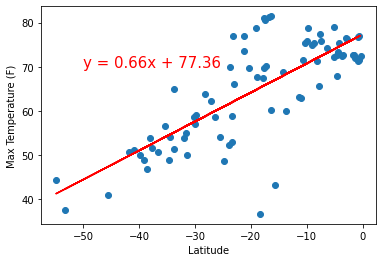

In [181]:
s_latitude = southern_hemisphere_df['Lat']
s_max_temp = southern_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_max_temp)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,70),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(s_latitude, s_max_temp)

print(f"The r-squared is: {rvalue**2}")
print("-------------------------------------")
print("The distribution of Max Temperature for both hemisphere are very similar due to the fact that the highest temperatures recorded closest to the equator and coldest furthest from the equator.  Temperature seem to be more frequent in the nothern hemisphere. ")
plt.savefig("../PythonAPI-Challenge/weatherimages/output6.png") 
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05285039402348778
-------------------------------------
Based on the linear regression of both hemisphere the increase in latitude follows with an increase in humidity.  The noticeable difference betweeen the two is that the southern hemisphere linear regression is about 15% more humidity that that of the nothern hemisphere. 


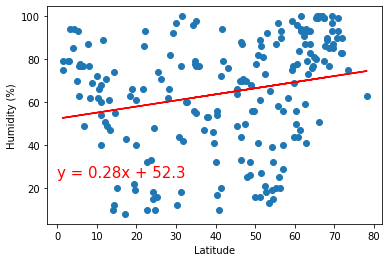

In [182]:
n_humidity = northern_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_humidity)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(n_latitude,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(n_latitude, n_humidity)

print(f"The r-squared is: {rvalue**2}")
print("-------------------------------------")
print(f"Based on the linear regression of both hemisphere the increase in latitude follows with an increase in humidity.  The noticeable difference betweeen the two is that the southern hemisphere linear regression is about 15% more humidity that that of the nothern hemisphere. ")
plt.savefig("../PythonAPI-Challenge/weatherimages/output7.png") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0743006547341585
-------------------------------------
Based on the linear regression of both hemisphere the increase in latitude follows with an increase in humidity.  The noticeable difference betweeen the two is that the southern hemisphere linear regression is about 15% more humidity that that of the nothern hemisphere. 


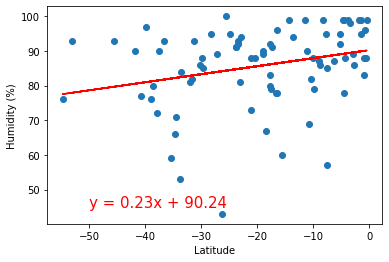

In [183]:
s_humidity = southern_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_humidity)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(s_latitude, s_humidity)

print(f"The r-squared is: {rvalue**2}")
print("-------------------------------------")
print(f"Based on the linear regression of both hemisphere the increase in latitude follows with an increase in humidity.  The noticeable difference betweeen the two is that the southern hemisphere linear regression is about 15% more humidity that that of the nothern hemisphere. ")
plt.savefig("../PythonAPI-Challenge/weatherimages/output8.png") 
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007940834690982107
---------------------------------------
Based on the linear regression of both hemisphere it seems to be a gradual build starting at the lowest latitude(~-55) of the southern hemisphere at a cloudiness percentage of about ~50 progressing up to the highest latitude(~80) of the northern hemisphere with a cloudiness percentage of ~70.


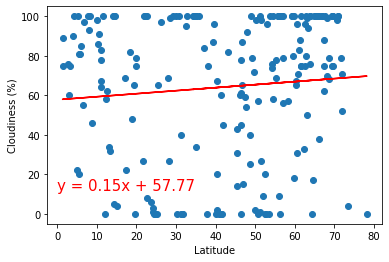

In [184]:
n_clouds = northern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_clouds)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(n_latitude,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(n_latitude, n_clouds)

print(f"The r-squared is: {rvalue**2}")
print("---------------------------------------")
print("Based on the linear regression of both hemisphere it seems to be a gradual build starting at the lowest latitude(~-55) of the southern hemisphere at a cloudiness percentage of about ~50 progressing up to the highest latitude(~80) of the northern hemisphere with a cloudiness percentage of ~70.")
plt.savefig("../PythonAPI-Challenge/weatherimages/output9.png") 
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0029275591771245855
----------------------------------------
Based on the linear regression of both hemisphere it seems to be a gradual build starting at the lowest latitude(~-55) of the southern hemisphere at a cloudiness percentage of about ~50 progressing up to the highest latitude(~80) of the northern hemisphere with a cloudiness percentage of ~70.


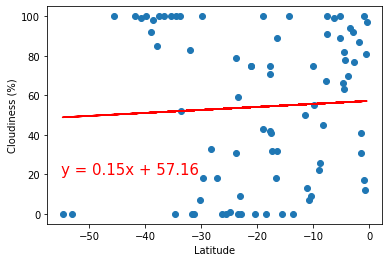

In [185]:
s_clouds = southern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_clouds)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(s_latitude, s_clouds)

print(f"The r-squared is: {rvalue**2}")
print("----------------------------------------")
print("Based on the linear regression of both hemisphere it seems to be a gradual build starting at the lowest latitude(~-55) of the southern hemisphere at a cloudiness percentage of about ~50 progressing up to the highest latitude(~80) of the northern hemisphere with a cloudiness percentage of ~70.")
plt.savefig("../PythonAPI-Challenge/weatherimages/output10.png") 
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0010707364247087387
---------------------------------------
In both hemisphere the wind speed gradually rises the further away the city is from the equator.  Wind speeds are higher in the nothern hemisphere.


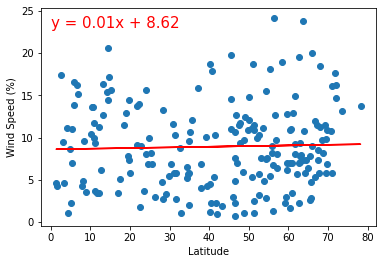

In [186]:
n_wind = northern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_wind)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(n_latitude,regress_values,"r-") 
plt.annotate(line_eq,(0,23),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.scatter(n_latitude, n_wind)

print(f"The r-squared is: {rvalue**2}")
print("---------------------------------------")
print(f"In both hemisphere the wind speed gradually rises the further away the city is from the equator.  Wind speeds are higher in the nothern hemisphere.")
plt.savefig("../PythonAPI-Challenge/weatherimages/output11.png") 
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024026389411421992
---------------------------------------
In both hemisphere the wind speed gradually rises the further away the city is from the equator.  Wind speeds are higher in the nothern hemisphere.


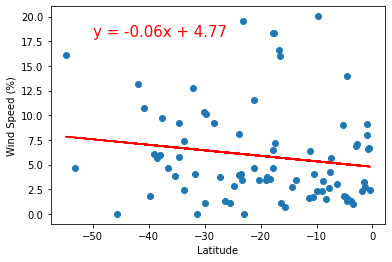

In [187]:
s_wind = southern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_wind)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(s_latitude,regress_values,"r-") 
plt.annotate(line_eq,(-50,18),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.scatter(s_latitude, s_wind)

print(f"The r-squared is: {rvalue**2}")
print("---------------------------------------")
print(f"In both hemisphere the wind speed gradually rises the further away the city is from the equator.  Wind speeds are higher in the nothern hemisphere.")
plt.savefig("../PythonAPI-Challenge/weatherimages/output12.png") 
plt.show()